In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('E:\SnehaWork\AIProject\Dataset\Customer-Churn.csv')
df.columns[df.isnull().any()].tolist() 

[]

In [3]:
Churned = df[df.Churn == 'Yes']
NonChurned = df[df.Churn == 'No']

number_of_Churned = len(Churned)
number_of_NonChurned = len(NonChurned)

Churned_percentage = round((number_of_Churned / (number_of_Churned + number_of_NonChurned)) * 100, 2)
valid_percentage = round((number_of_NonChurned / (number_of_Churned + number_of_NonChurned)) * 100, 2)
print(number_of_NonChurned,number_of_Churned)
#df.columns.tolist()

5174 1869


In [4]:
#df.dtypes
#count yes and no on base data, train and test

In [5]:
df.drop('customerID',axis='columns',inplace=True)

In [6]:
#error='coerce' ignores the errors. Conversion for all except for error values i.e. empty spaces. 
#.isnull() gives columns which have empty spaces
#shows the data which has TotalCharges as null. Good to drop these
df.columns[df.isnull().any()].tolist() 
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [7]:
#Drop rows with TotalCharges as null

df1 = df[df.TotalCharges!=' ']

In [8]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [10]:
#replace Yes/No to 1/0 since ML doesn't understand text

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
df1['gender'].replace({'Male':1,'Female':0},inplace=True)

In [12]:
#One hot encoding for multiclass i.e. InternetService, Contract, PaymentMethod

multiclass_col=['InternetService', 'Contract', 'PaymentMethod']
df1 = pd.get_dummies(data=df1,columns=multiclass_col)

In [13]:
#scaling the values between 1 and 0 for below
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

#MinMaxScaler scales the data between 0 and 1
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [14]:
def print_unique_col_values(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

In [15]:
print_unique_col_values(df1)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [16]:
#Drop churn 
x = df1.drop('Churn',axis=1)  #check axis=0/1
y = df1['Churn']
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train_tbc, X_test, y_train_tbc, y_test = train_test_split(x, y, test_size=0.2,random_state=42,stratify=y)

In [18]:
y_test.value_counts()

0    517
1    187
Name: Churn, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_sample(X_train_tbc.astype('float'), y_train_tbc.astype('float'))



Using TensorFlow backend.


In [18]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15)

In [19]:
#X_test = pd.DataFrame(X_test, columns=x.columns)
#X_train = pd.DataFrame(X_train_oversampled, columns=X_train.columns)


In [39]:
y_train = pd.Series(y_train)


In [41]:
y_train.value_counts()

1.0    4646
0.0    4646
dtype: int64

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=15,stratify=y_train)

In [21]:
num_of_cols = len(x.columns)
num_of_cols

26

In [22]:
X_train=X_train.reshape(X_train.shape[0],num_of_cols, 1).astype('float32') 
X_test=X_test.values.reshape(X_test.shape[0],num_of_cols, 1).astype('float32')
X_val=X_val.reshape(X_val.shape[0],num_of_cols, 1).astype('float32')

#sometimes works as X_val.values.reshape(X_val.shape[0],26, 1).astype('float32')

In [45]:
y_val.shape



(930,)

In [25]:
#X_sm_val.shape


In [46]:
X_train.shape

(8362, 26, 1)

In [33]:
from keras.layers import SpatialDropout1D

cnn = models.Sequential([
    layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(26,1)),  
    layers.MaxPooling1D(pool_size=3),
    
    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.SpatialDropout1D(0.5),
    layers.MaxPooling1D(pool_size=3),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(20, activation='relu',kernel_regularizer='l2'), #krelu ?
    layers.Dense(1, activation='sigmoid')
])

#cnn.summary()

cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy',f_score(study, compare and put it in report about which is better metrics for your model)],learning_rate= accuracy bumpy so reduce it 0.1-0.5)

history = cnn.fit(X_train, y_train, epochs=200 or more,validation_data=(X_val,y_val),batch_size=40 to 60)
#The default interpretation of the dropout hyperparameter is the probability of training a given node in a layer, where 1.0 means no dropout, and 0.0 means no outputs from the layer.

#A good value for dropout in a hidden layer is between 0.5 and 0.8. Input layers use a larger dropout rate, such as of 0.8.

Train on 8362 samples, validate on 930 samples
Epoch 1/100
8362/8362 [==============================] - 5s 577us/sample - loss: 0.9696 - accuracy: 0.5987 - val_loss: 0.8548 - val_accuracy: 0.7323
Epoch 2/100
8362/8362 [==============================] - 2s 201us/sample - loss: 0.7980 - accuracy: 0.6978 - val_loss: 0.6997 - val_accuracy: 0.7355
Epoch 3/100
8362/8362 [==============================] - 2s 197us/sample - loss: 0.6837 - accuracy: 0.7297 - val_loss: 0.6260 - val_accuracy: 0.7366
Epoch 4/100
8362/8362 [==============================] - 2s 219us/sample - loss: 0.6169 - accuracy: 0.7484 - val_loss: 0.5843 - val_accuracy: 0.7387
Epoch 5/100
8362/8362 [==============================] - 2s 227us/sample - loss: 0.5860 - accuracy: 0.7473 - val_loss: 0.5565 - val_accuracy: 0.7570
Epoch 6/100
8362/8362 [==============================] - 2s 225us/sample - loss: 0.5584 - accuracy: 0.7538 - val_loss: 0.5377 - val_accuracy: 0.7667
Epoch 7/100
8362/8362 [==============================] - 2s

In [34]:
cnn.evaluate(X_test,y_test)

704/704 [==============================] - 0s 689us/sample - loss: 0.5462 - accuracy: 0.7088


[0.5462446497245268, 0.7088068]

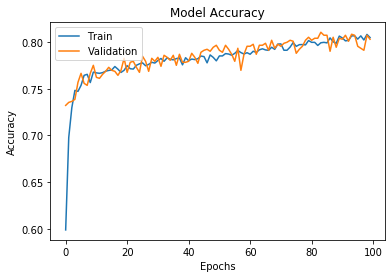

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

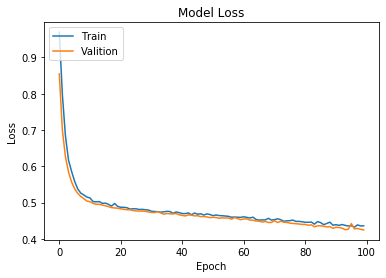

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valition'], loc='upper left')
plt.show()

In [37]:
yp= cnn.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.4:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [38]:
from sklearn.metrics import confusion_matrix , classification_report
yp_pred= cnn.predict(X_val)
yp_pred = np.round(yp_pred)
print("Classification Report: \n", classification_report(y_val, yp_pred))


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.74      0.79       465
         1.0       0.77      0.86      0.81       465

    accuracy                           0.80       930
   macro avg       0.81      0.80      0.80       930
weighted avg       0.81      0.80      0.80       930



In [39]:
from sklearn.metrics import confusion_matrix , classification_report
yp_pred= cnn.predict(X_test)
yp_pred = np.round(yp_pred)
print("Classification Report: \n", classification_report(y_test, yp_pred))


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.69      0.78       517
           1       0.47      0.75      0.58       187

    accuracy                           0.71       704
   macro avg       0.68      0.72      0.68       704
weighted avg       0.77      0.71      0.72       704



In [53]:
tf.math.confusion_matrix(labels=y_test,predictions=yp_pred)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[422,  95],
       [ 70, 117]])>

In [25]:
cnn.evaluate(X_test,y_test)

704/704 [==============================] - 1s 808us/sample - loss: 0.5138 - accuracy: 0.7344


[0.5137553174387325, 0.734375]

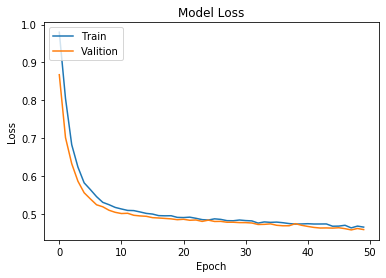

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valition'], loc='upper left')
plt.show()

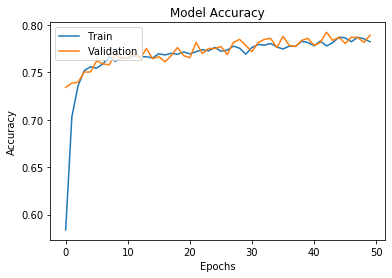

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [73]:
from sklearn.metrics import confusion_matrix , classification_report
yp_pred= cnn.predict(X_test)
yp_pred = np.round(yp_pred)
print("Classification Report: \n", classification_report(y_test, yp_pred))


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.76      0.81       517
         1.0       0.79      0.87      0.83       517

    accuracy                           0.82      1034
   macro avg       0.82      0.82      0.82      1034
weighted avg       0.82      0.82      0.82      1034



In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_test, y_test = smote.fit_sample(X_test.astype('float'), y_test.astype('float'))



In [67]:
X_test=X_test.reshape(X_test.shape[0],num_of_cols,1).astype('float32')
